In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)
import mat73

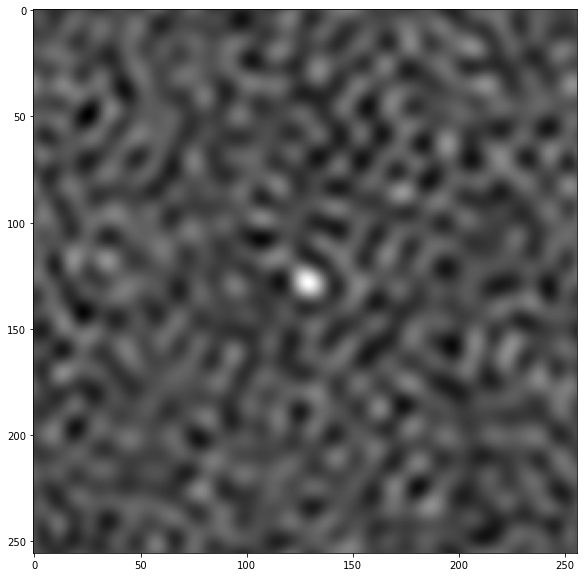

In [2]:
""" Function to import used to unpack rows of FFT-field"""
def exp_expand(data,shape):
    x = np.arange(shape[0]) - shape[0] / 2
    y = np.arange(shape[1]) - shape[1] / 2
    X, Y = np.meshgrid(x, y)
    bg=np.zeros((shape[0]*shape[1],))+0j
    X=np.reshape(np.fft.fftshift(X),(shape[0]*shape[1]))
    Y=np.reshape(np.fft.fftshift(Y),(shape[0]*shape[1]))
    RHO=X**2+Y**2
    Inds=np.argsort(RHO)
    Inds=np.sort(Inds[:data.shape[0]])

    bg[Inds[:data.shape[0]]]=data
    bg=np.reshape(bg,(shape[0],shape[1]))
  
    return bg


# Load a matfile with "downsized" ROI:s around particles found in the experimental data 
# Download mat-file from shared drive to your private one if to run in Colab!
filePath = "C:\\Users\isakb\OneDrive - Chalmers University of Technology\Dokument\F\F3\Kandidatarbete\Labbets MATLAB-kod\Data\PSL240_noGold_TrackIm\PSL240_noGoldEvery1_1_movie_1CompletedTraces.mat"
filePath = "C:\\Users\isakb\OneDrive - Chalmers University of Technology\Dokument\F\F3\Kandidatarbete\Labbets MATLAB-kod\Data\\traces128x128ROI.mat"

expData = mat73.loadmat(filePath)
expData = expData['CompletedTraces']

outPutShape = [256, 256]
realM = np.zeros((len(expData), outPutShape[0], outPutShape[0], 1))
imM = 1j * np.ones((len(expData), outPutShape[0], outPutShape[0], 1))
savedParticles = realM + imM

# This loop unpacks and stores all fields found in the processed video in an 3d-array
for i in range(len(expData)):

    roiData = expData[i]['ROI'][0]
    roiData = np.array(roiData)
    roiData = roiData[5, :]

    fftOfParticle = exp_expand(roiData, outPutShape)
    particleROI = np.fft.ifft2(fftOfParticle)
    particleROI = np.fft.fftshift(particleROI)
    particleROI = np.expand_dims(particleROI, axis = -1)

    savedParticles[i, :, :, :] = particleROI
    

# Example of how a field could look
imToShow = np.imag(savedParticles[20, :, :, :]) 
plt.imshow(imToShow, cmap = "gray")
plt.show()


In [4]:

# We'll store every found particle's positions during a trace
# in a dictionary with "Particle i" as a key 
particleStr = ["Particle "] * len(expData)
ind = list(range(len(expData)))

particleKey = list(map(lambda l1, l2: l1 + str(l2), particleStr, ind))
posVal = []

for i in range(len(expData)):
    posData = expData[i]['Positions']
    posData = np.array(posData)

    # Cut away unneccessary columns and adjust offset between actual frame
    posData = posData[:, 0:4]
    posData[:, 0] -= 203
    posVal.append(posData)

particlePosData = dict(zip(particleKey, posVal))


In [10]:
# Return new dictionary only with particles tracked in the first 100 frames
newKey = []
newPos = []
for items in particlePosData.items():
    key = items[0]
    val = items[1]

    if np.amax(val[:, 0]) <= 100:
        newKey.append(key)
        newPos.append(val)

newDict = dict(zip(newKey, newPos))


[[ 64.          67.36483201  81.28308678  -3.55      ]
 [ 65.          67.67797275  82.55315625  -3.18833333]
 [ 66.          68.06417977  84.03262949  -2.18583333]
 [ 67.          68.29334192  85.94083432  -2.2       ]
 [ 68.          68.26260279  87.64494527  -2.7325    ]
 [ 69.          68.48601206  89.6693739   -2.15666667]
 [ 70.          68.3091722   91.90550048  -2.655     ]
 [ 71.          68.81997842  93.92646637  -2.52916667]
 [ 73.          68.31007107  96.49265343  -3.17166667]
 [ 75.          68.0751015   99.91340401  -3.72083333]
 [ 76.          68.18308597 101.53153868  -2.9375    ]
 [ 78.          66.94791044 104.97622819  -3.22416667]
 [ 79.          67.27747177 106.58333318  -3.49333333]
 [ 80.          67.32987175 107.89799205  -1.93583333]
 [ 81.          67.37395477 110.26044085  -2.9025    ]
 [ 82.          67.1242452  111.97347825  -3.64916667]]
